# Exploración y clasificación del Glass Dataset en Python
#### Por: Tomás Garzón Gómez, Daniel Garzón Fraile, Santiago Villota Alava 

### Exploración del Dataset

In [6]:
#Librerias a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from time import time


In [7]:
glass = pd.read_csv('glass.cvs')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
print(glass.shape)

(214, 10)


In [9]:
print(glass.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

In [10]:
print(glass.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


### Propiedades del Dataset

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


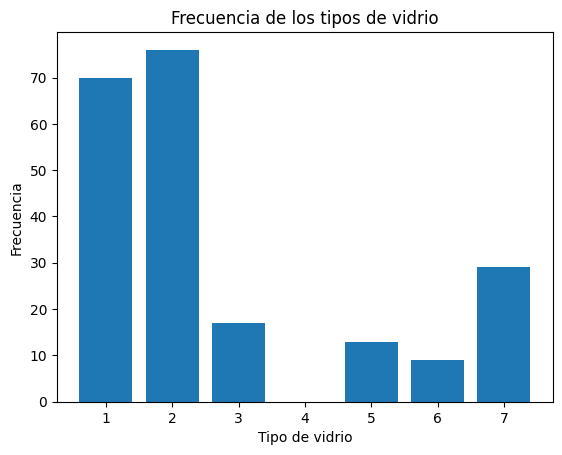

In [11]:
freq_type = glass['Type'].value_counts()
print(freq_type)
plt.title('Frecuencia de los tipos de vidrio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=10)
plt.xlabel('Tipo de vidrio', fontsize=10)
plt.bar(freq_type.index, freq_type.values)
plt.show()

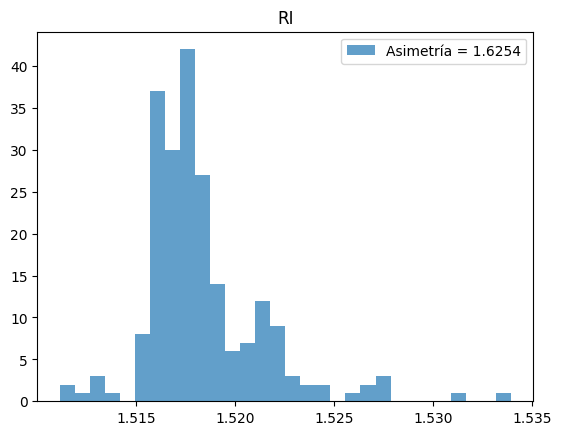

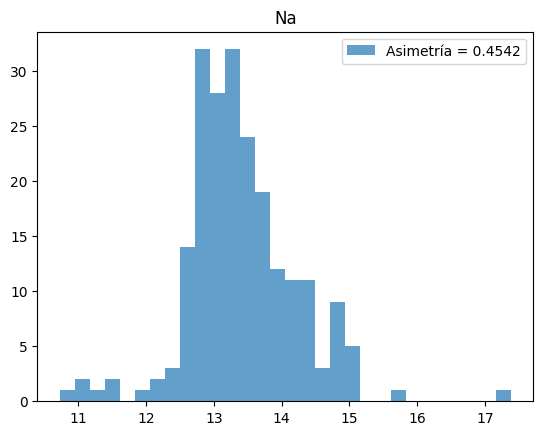

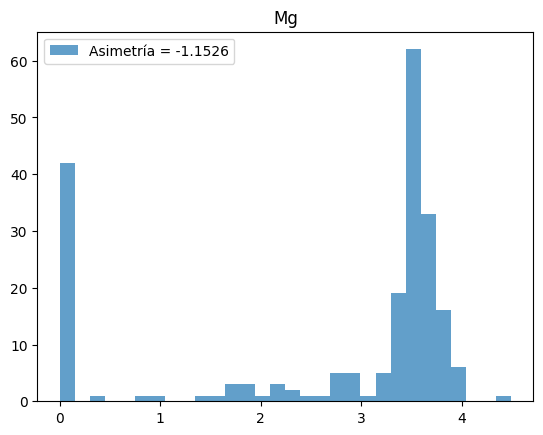

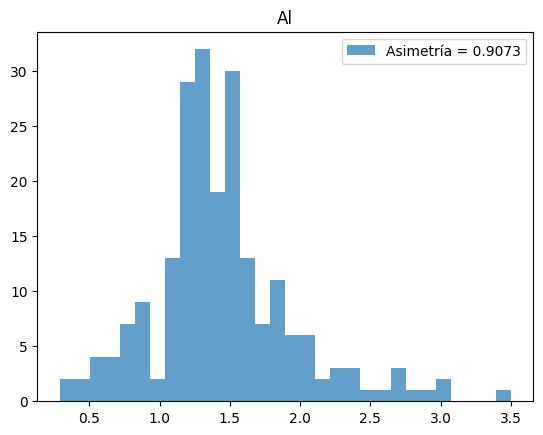

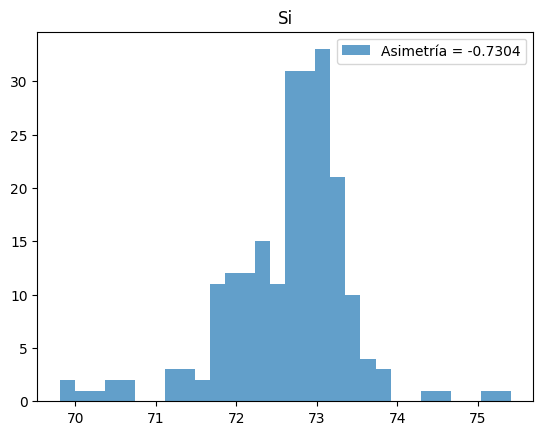

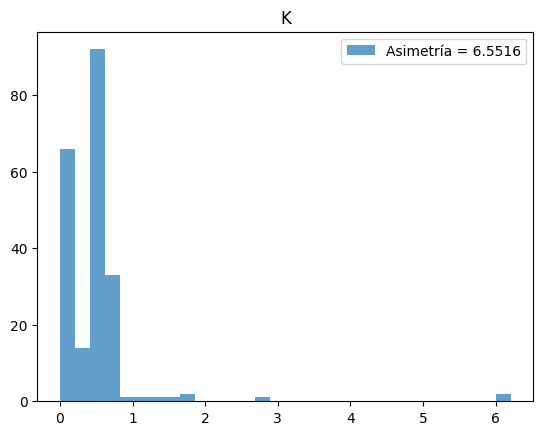

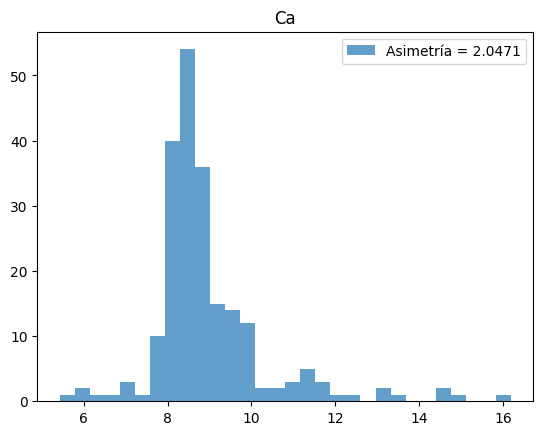

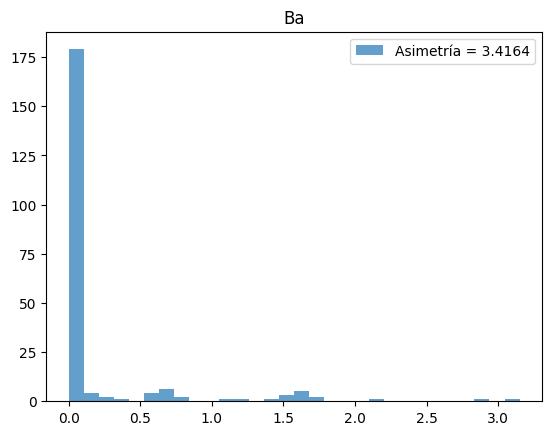

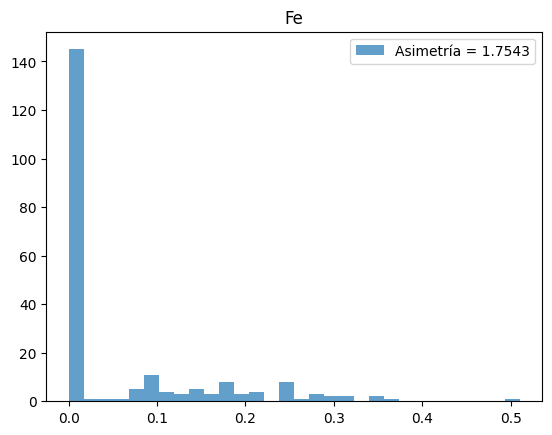

In [12]:
for feat in glass.columns:
  if feat != 'Type':
    skew = glass[feat].skew()
    plt.title(f'{feat}')
    plt.hist(glass[feat], bins=30, label=f'Asimetría = {skew:.4f}', alpha=0.7)
    plt.legend()
    plt.show()

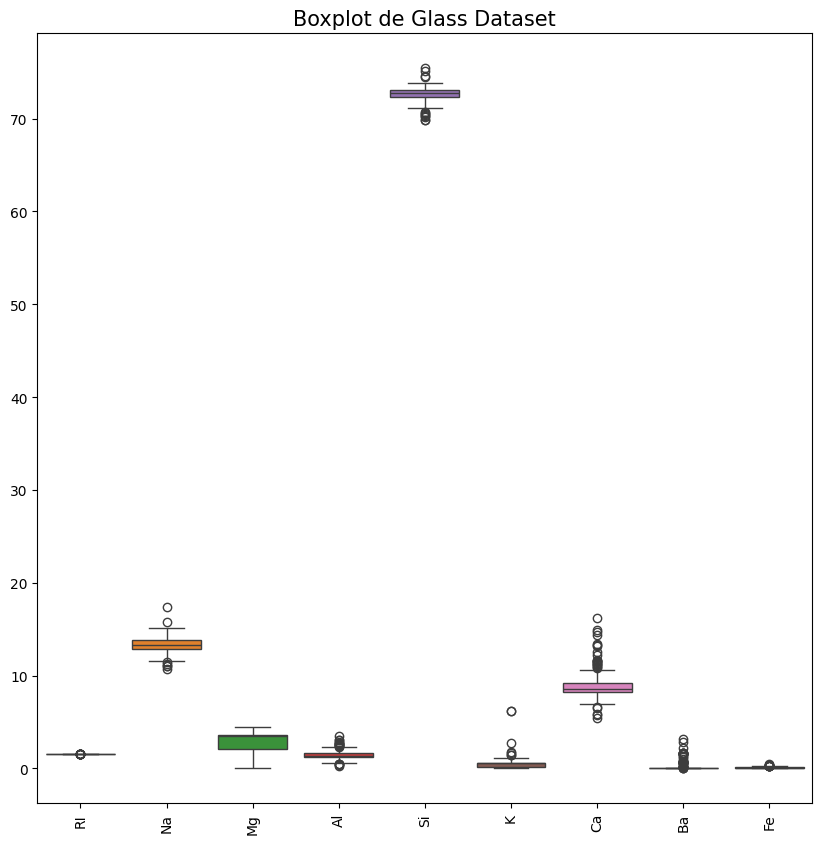

In [13]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=glass[glass.columns[:-1].tolist()])
plt.title('Boxplot de Glass Dataset', fontsize=15)
plt.xticks(rotation=90) 
plt.show()

In [14]:
def identify_outliers(df):
  outliers = []
  for col in df.columns.tolist():
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_list = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index  
    outliers.extend(outliers_list)
  outliers.sort()
  outliers_count = {}
  for i in range(len(outliers)):
    if outliers_count.get(outliers[i]) is not None:
      outliers_count[outliers[i]] += 1
    else:
      outliers_count[outliers[i]] = 1 

  atypical = []
  for key, value in outliers_count.items():
    if value > 2:
      atypical.append(key)



  return atypical 

print(identify_outliers(glass[glass.columns[:-1].tolist()]))


[103, 105, 106, 107, 110, 111, 163, 171, 172, 184, 185, 186, 189, 207]


<Figure size 1000x1000 with 0 Axes>

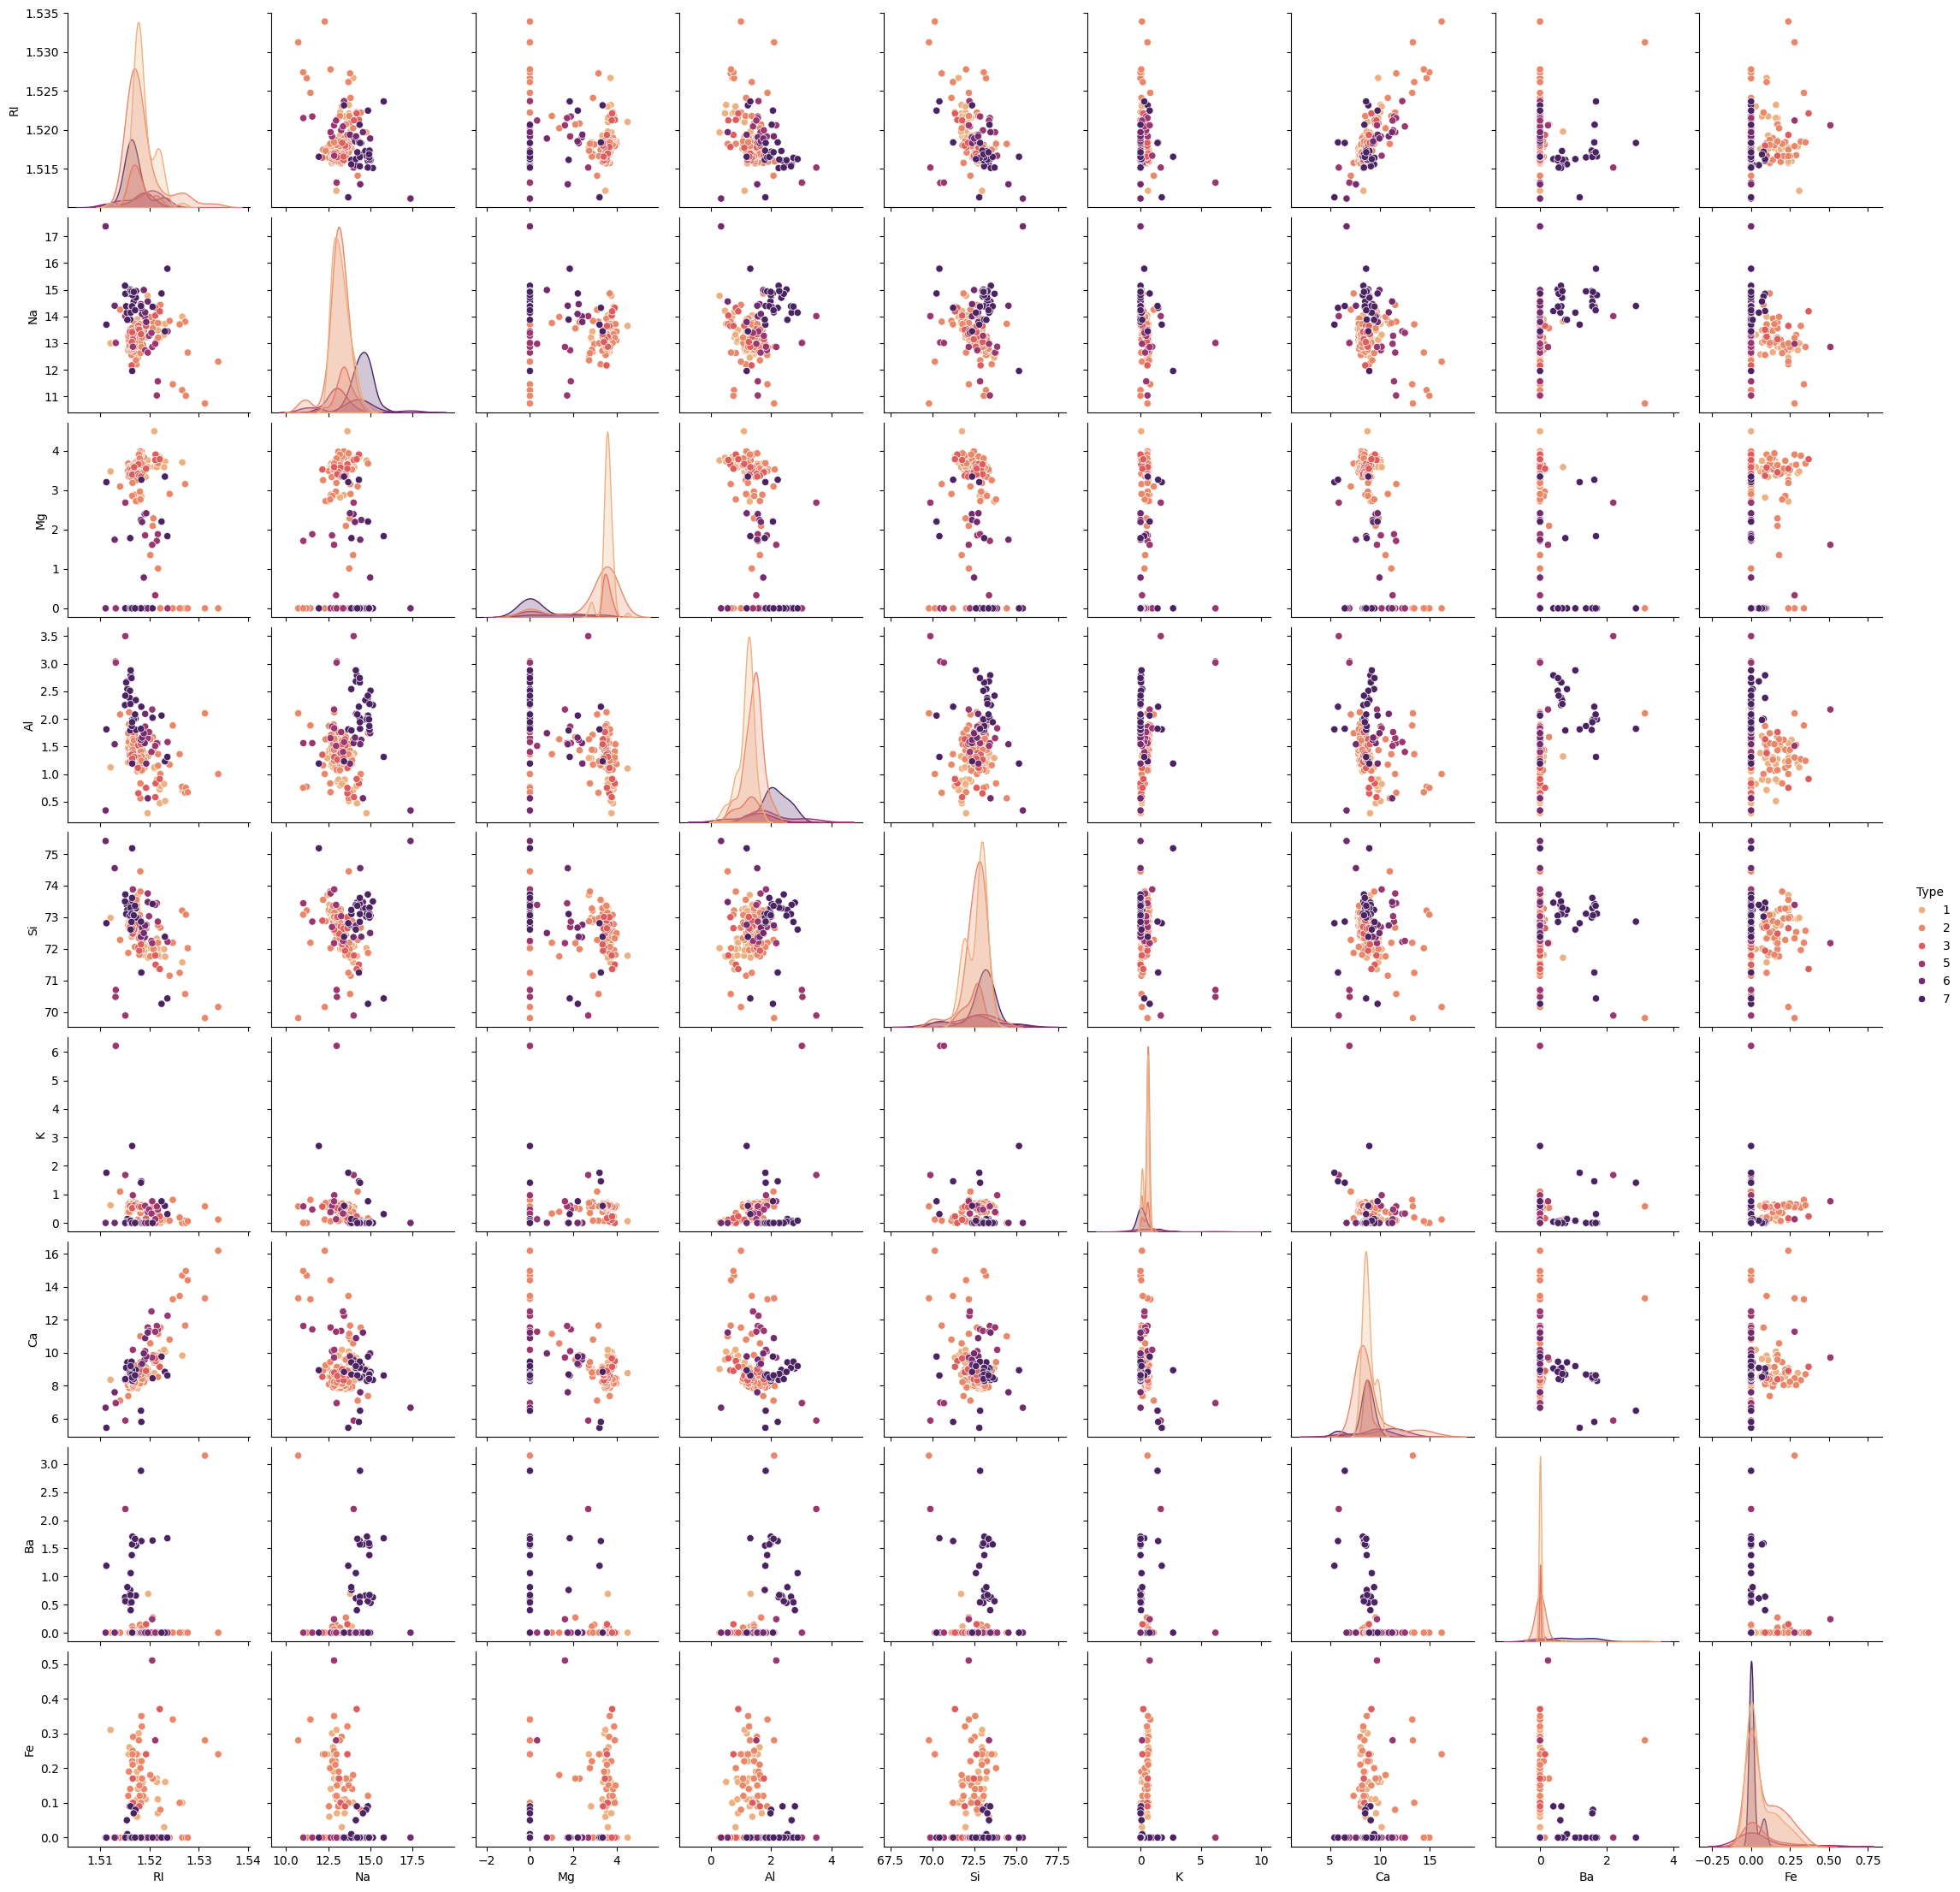

In [15]:
plt.figure(figsize=(10, 10))
sns.pairplot(glass,  hue='Type', palette='flare')
plt.show()

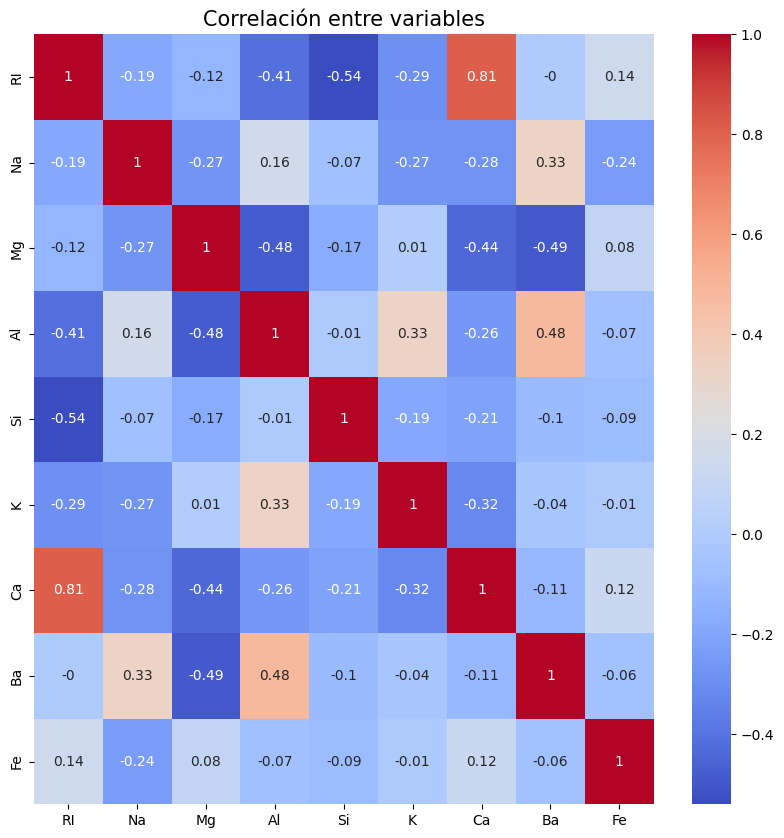

In [16]:
matrix = glass[glass.columns[:-1].tolist()].corr().round(2)
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables', fontsize=15)
plt.show()

### Preparación de los datos

In [17]:
glass.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


(200, 10)


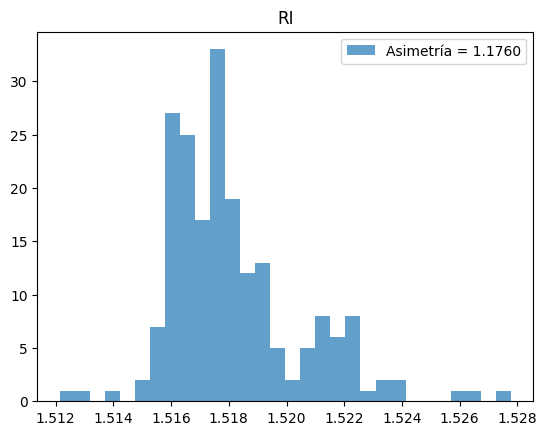

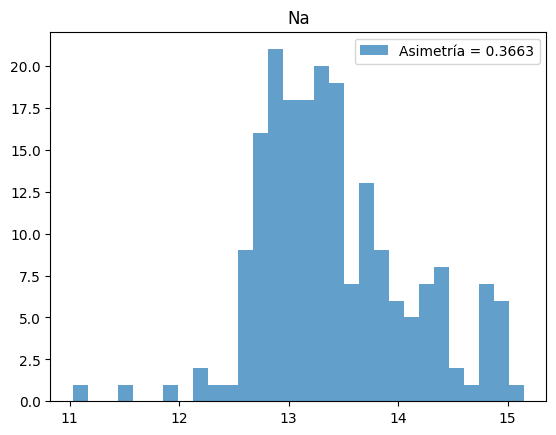

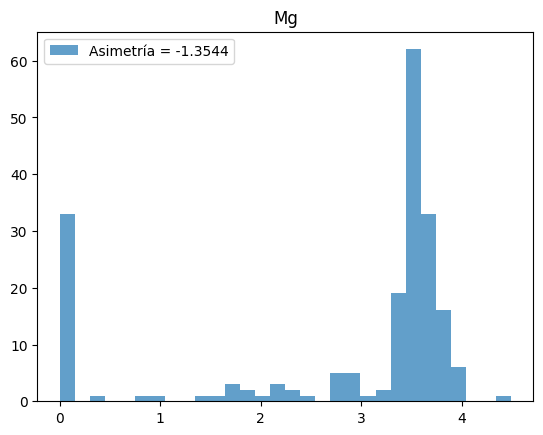

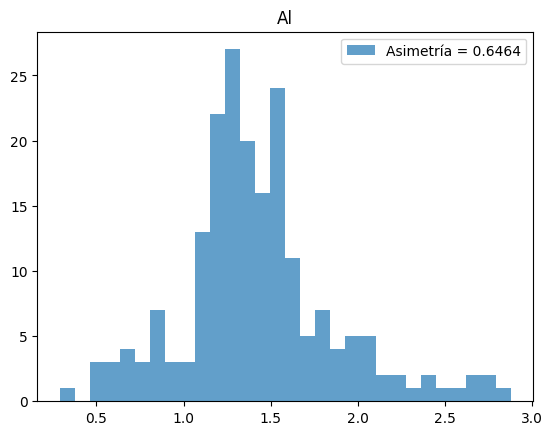

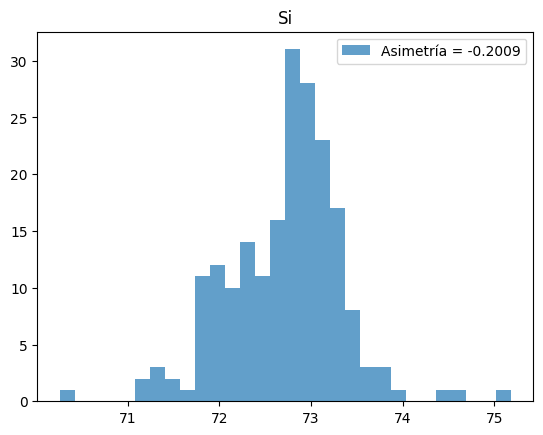

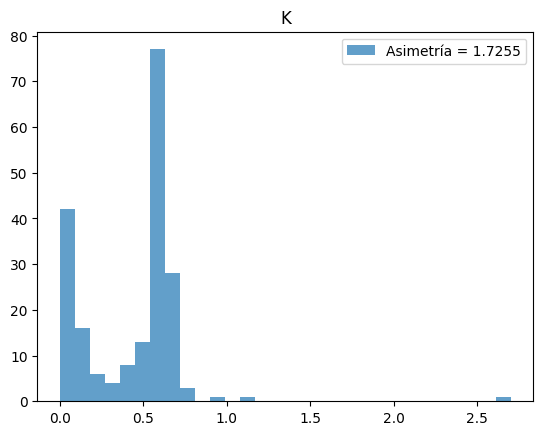

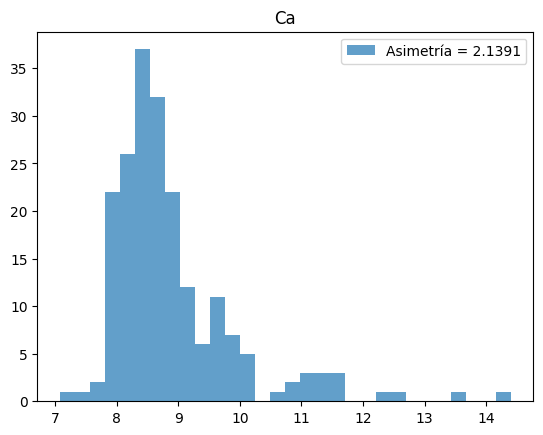

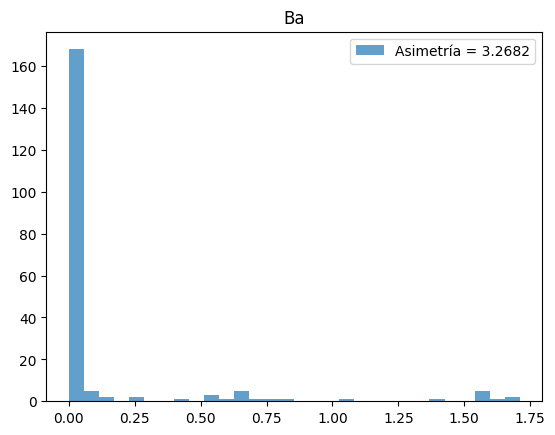

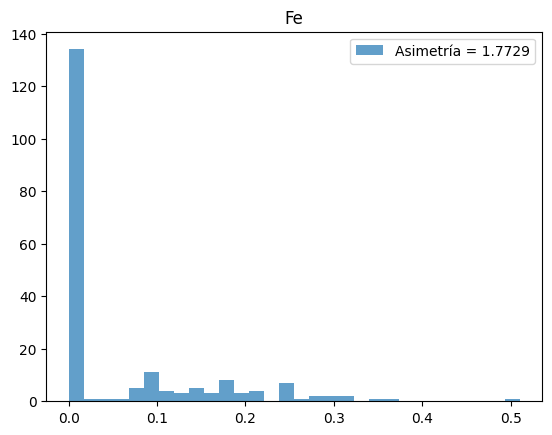

In [18]:
outliers = identify_outliers(glass[glass.columns[:-1].tolist()])
glass_clean = glass.drop(outliers)
print(glass_clean.shape)
for feat in glass_clean.columns:
  if feat != 'Type':
    skew = glass_clean[feat].skew()
    plt.title(f'{feat}')
    plt.hist(glass_clean[feat], bins=30, label=f'Asimetría = {skew:.4f}', alpha=0.7)
    plt.legend()
    plt.show()

In [19]:
glass_clean.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,1.518173,13.41575,2.801850,1.424950,72.722250,0.428700,8.90035,0.123650,0.056700,2.670000
std,0.002335,0.69161,1.370908,0.444292,0.620959,0.304392,1.03586,0.362892,0.095718,2.054802
min,1.512150,11.03000,0.000000,0.290000,70.260000,0.000000,7.08000,0.000000,0.000000,1.000000
25%,1.516545,12.93000,2.635000,1.190000,72.355000,0.130000,8.27750,0.000000,0.000000,1.000000
50%,1.517650,13.30000,3.495000,1.360000,72.820000,0.550000,8.60000,0.000000,0.000000,2.000000
75%,1.519060,13.79500,3.610000,1.612500,73.100000,0.600000,9.14000,0.000000,0.100000,3.000000
max,1.527770,15.15000,4.490000,2.880000,75.180000,2.700000,14.40000,1.710000,0.510000,7.000000


In [20]:
boxcox_features = []
for feat in glass_clean.columns:
  if feat != 'Type':
    fitted_data, fitted_lambda = stats.boxcox(glass_clean[feat]+1)
    boxcox_features.append(fitted_data)

boxcox_features = np.array(boxcox_features).T
glass_clean_boxcox = pd.DataFrame(boxcox_features, columns=glass_clean.columns[:-1], index=glass_clean.index)
glass_clean_boxcox['Type'] = glass_clean['Type']


In [21]:
glass_clean_boxcox.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,200.000000,2.000000e+02,200.000000,200.000000,200.000000
mean,2.899819e-03,0.910643,14.813501,0.955244,6.067051e+09,0.342872,1.999249e-01,0.013377,0.019141,2.670000
std,4.347692e-19,0.003076,8.011923,0.217702,2.873462e+08,0.213507,8.577975e-07,0.031188,0.027757,2.054802
min,2.899819e-03,0.897962,0.000000,0.261374,5.004570e+09,0.000000,1.999215e-01,0.000000,0.000000,1.000000
25%,2.899819e-03,0.908540,10.569803,0.850076,5.893107e+09,0.122922,1.999244e-01,0.000000,0.000000,1.000000
50%,2.899819e-03,0.910269,18.555034,0.938477,6.106934e+09,0.447403,1.999248e-01,0.000000,0.000000,2.000000
75%,2.899819e-03,0.912445,19.835863,1.060851,6.238738e+09,0.480536,1.999254e-01,0.000000,0.051652,3.000000
max,2.899819e-03,0.917710,31.408319,1.561947,7.293050e+09,1.392148,1.999271e-01,0.091142,0.068796,7.000000


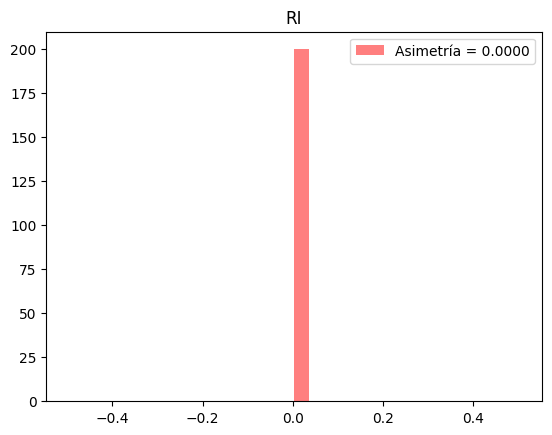

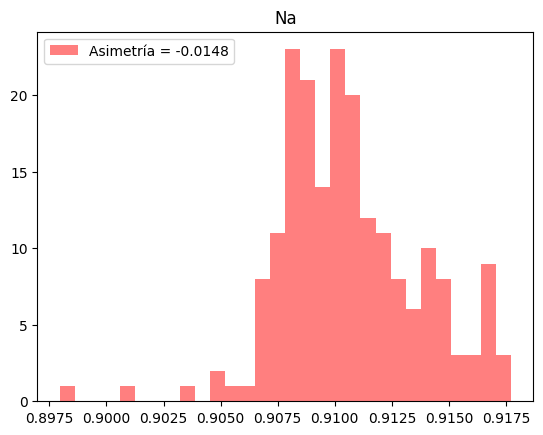

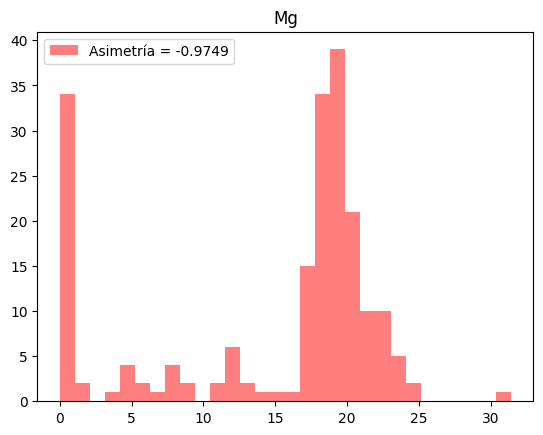

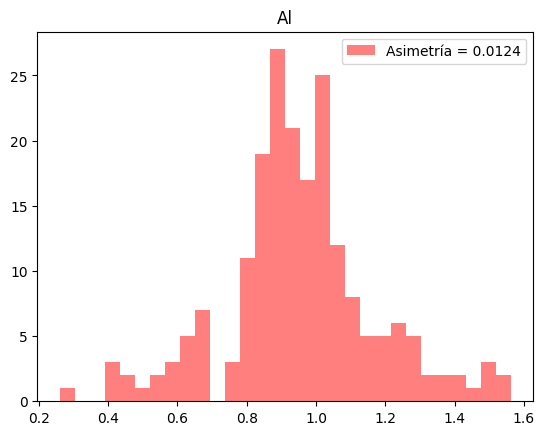

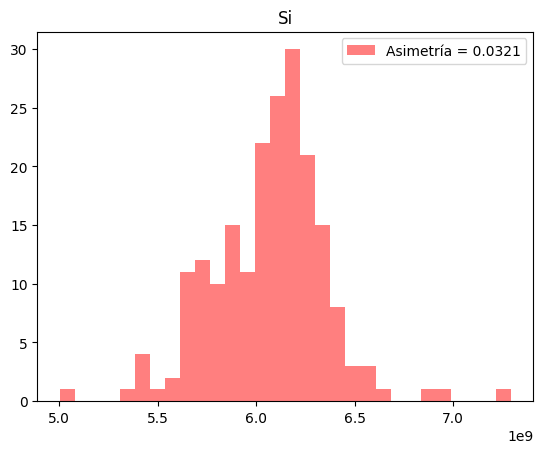

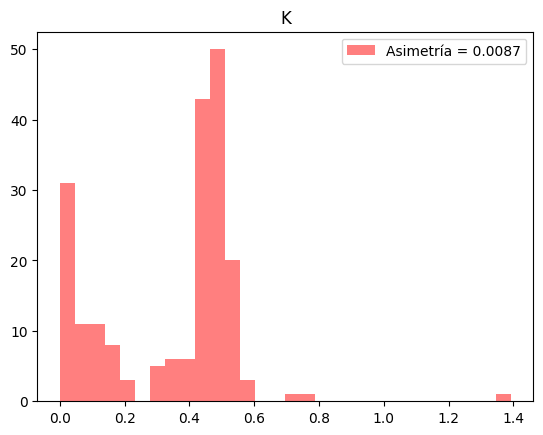

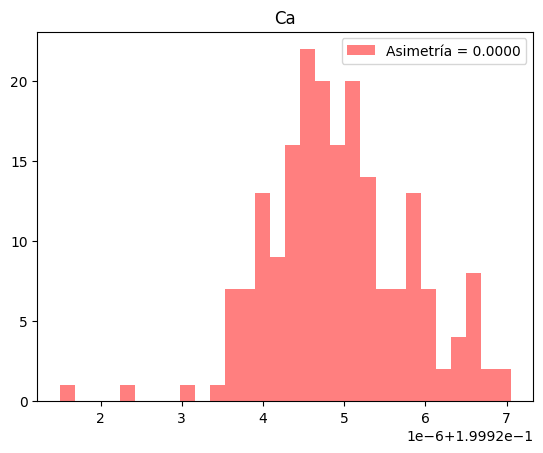

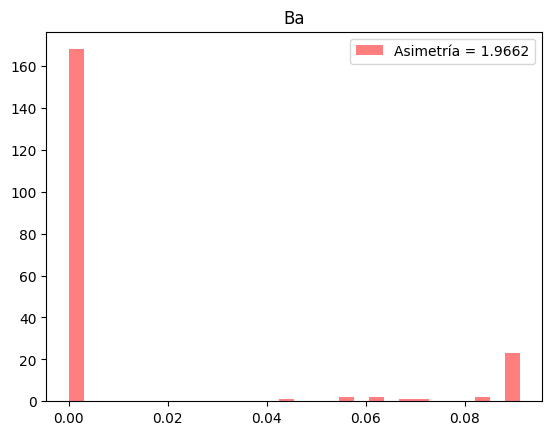

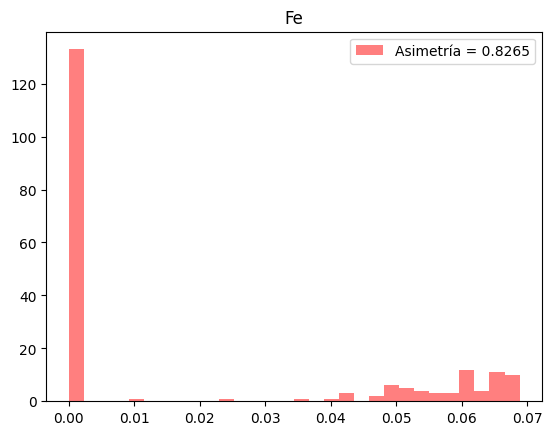

In [22]:
for feat in glass_clean_boxcox.columns:
  if feat != 'Type':
    skew = glass_clean_boxcox[feat].skew()
    plt.title(f'{feat}')
    plt.hist(glass_clean_boxcox[feat], bins=30, label=f'Asimetría = {skew:.4f}',
              alpha=0.5, color='red')
    plt.legend()
    plt.show()

In [23]:
for feat in glass_clean_boxcox.columns:
  if feat != 'Type':
    delta = np.abs(glass_clean_boxcox[feat].skew() - glass_clean_boxcox[feat].skew())
    if delta < 1.0:
      print(f'{feat} es menos asimétrica, después de aplicar Box-Cox')
    else:
      print(f'{feat} es más asimétrica, después de aplicar Box-Cox')

RI es menos asimétrica, después de aplicar Box-Cox
Na es menos asimétrica, después de aplicar Box-Cox
Mg es menos asimétrica, después de aplicar Box-Cox
Al es menos asimétrica, después de aplicar Box-Cox
Si es menos asimétrica, después de aplicar Box-Cox
K es menos asimétrica, después de aplicar Box-Cox
Ca es menos asimétrica, después de aplicar Box-Cox
Ba es menos asimétrica, después de aplicar Box-Cox
Fe es menos asimétrica, después de aplicar Box-Cox


### Evaluación de Algoritmos

##### Proprocesamiento

In [ ]:
X = glass_clean.drop('Type', axis=1)
y = glass_clean['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##### Algortimo \#1

In [50]:
name = "Logistic Regression"
LR_model = LogisticRegression(max_iter=5000, random_state=10)

start = time()
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)
t_elapsed = time() - start

print(f"Model: {name}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Time: {t_elapsed:.4f} seconds")
print(classification_report(y_test, y_pred))
print("=" * 60)

Model: Logistic Regression
Accuracy: 0.6250
Time: 0.0089 seconds
              precision    recall  f1-score   support

           1       0.67      0.38      0.48        16
           2       0.50      0.79      0.61        14
           3       0.00      0.00      0.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           0.62        40
   macro avg       0.69      0.69      0.68        40
weighted avg       0.64      0.62      0.61        40



##### Algoritmo #2

In [51]:
name = "Random Forest"
RF_model = RandomForestClassifier(random_state=10)

start = time()
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
t_elapsed = time() - start

print(f"Model: {name}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Time: {t_elapsed:.4f} seconds")
print(classification_report(y_test, y_pred))
print("=" * 60)

Model: Random Forest
Accuracy: 0.7250
Time: 0.1254 seconds
              precision    recall  f1-score   support

           1       0.82      0.56      0.67        16
           2       0.63      0.86      0.73        14
           3       0.33      0.50      0.40         2
           5       1.00      1.00      1.00         2
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3

    accuracy                           0.72        40
   macro avg       0.80      0.76      0.77        40
weighted avg       0.76      0.72      0.73        40



##### Algoritmo #3

In [52]:
name = "Gradient Boosting"
GB_model = GradientBoostingClassifier(random_state=10)

start = time()
GB_model.fit(X_train, y_train)
y_pred = GB_model.predict(X_test)
t_elapsed = time() - start

print(f"Model: {name}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Time: {t_elapsed:.4f} seconds")
print(classification_report(y_test, y_pred))
print("=" * 60)

Model: Gradient Boosting
Accuracy: 0.7500
Time: 0.6392 seconds
              precision    recall  f1-score   support

           1       0.91      0.62      0.74        16
           2       0.68      0.93      0.79        14
           3       0.00      0.00      0.00         2
           5       1.00      1.00      1.00         2
           6       1.00      0.67      0.80         3
           7       0.75      1.00      0.86         3

    accuracy                           0.75        40
   macro avg       0.72      0.70      0.70        40
weighted avg       0.78      0.75      0.75        40



### Análisis y comparación de algoritmos

##### Matriz de confusión

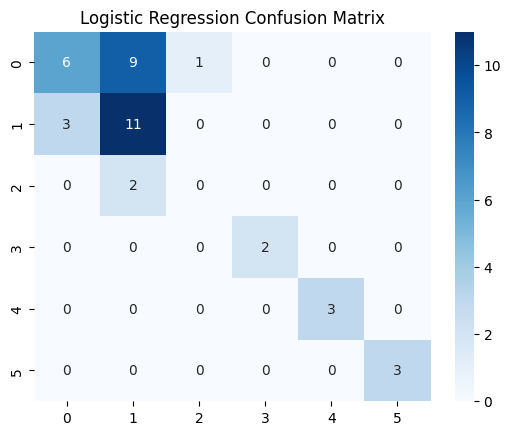

In [53]:
y_pred = LR_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

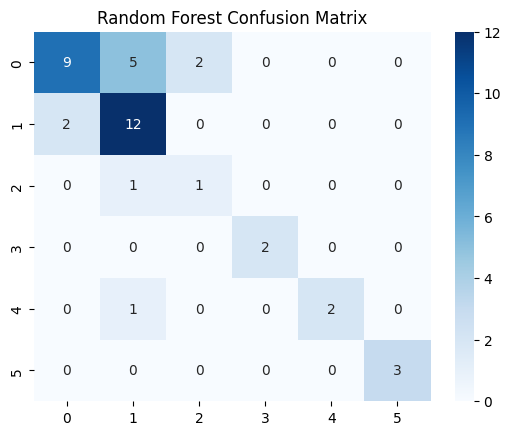

In [54]:
y_pred = RF_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

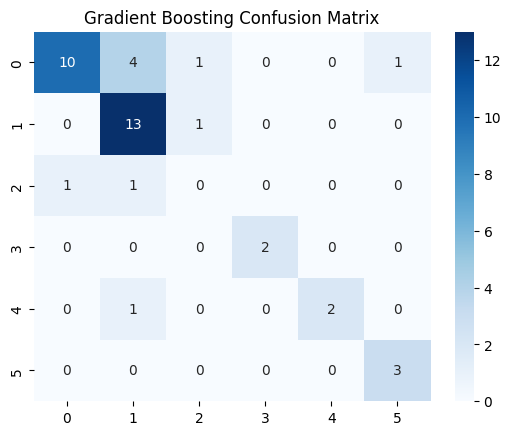

In [55]:
y_pred = GB_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

#### Validación Cruzada

In [56]:
# Cross-validation on Logistic Regression
lr_cv_scores = cross_val_score(LR_model, X, y, cv=6, scoring='accuracy')
print(f"Logistic Regression - Cross-Validation Accuracy: {100 * lr_cv_scores.mean():.4f} (±{100 * lr_cv_scores.std():.4f})")

Logistic Regression - Cross-Validation Accuracy: 64.9733 (±8.0632)


In [57]:
# Cross-validation on Random Forest
rf_cv_scores = cross_val_score(RF_model, X, y, cv=6, scoring='accuracy')
print(f"Random Forest - Cross-Validation Accuracy: {100 * rf_cv_scores.mean():.4f} (±{100 * rf_cv_scores.std():.4f})")

Random Forest - Cross-Validation Accuracy: 72.9501 (±9.3505)


In [58]:
# Cross-validation on Gradient Boosting
gb_cv_scores = cross_val_score(GB_model, X, y, cv=6, scoring='accuracy')
print(f"Gradient Boosting - Cross-Validation Accuracy: {100 * gb_cv_scores.mean():.4f} (±{100 * gb_cv_scores.std():.4f})")

Gradient Boosting - Cross-Validation Accuracy: 74.9554 (±9.6123)


#### Diagrama de caja de comparación de algoritmos

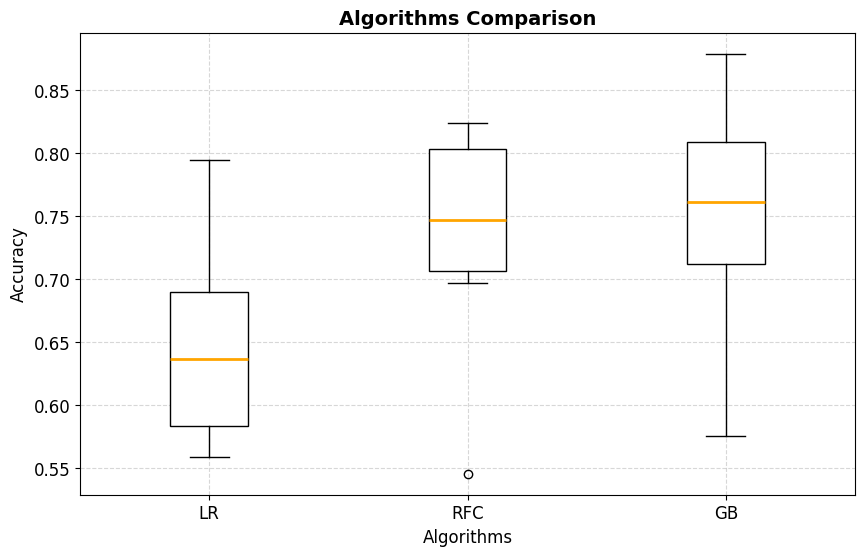

In [59]:
results = [lr_cv_scores, rf_cv_scores, gb_cv_scores]
labels = ["LR","RFC", "GB"]

plt.figure(figsize=(10, 6))
plt.boxplot(results, patch_artist=True, 
            boxprops=dict(facecolor="white", color="black"),
            medianprops=dict(color="orange", linewidth=2),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"))

plt.xticks(ticks=range(1, len(labels) + 1), labels=labels, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.title("Algorithms Comparison", fontsize=14, fontweight='bold')
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.show()


#### Optimización de hiperparámetros

In [61]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],     # Maximum depth of trees
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
}

grid_search = GridSearchCV(RF_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")
   

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.8063


In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],          # Regularization strength
    'solver': ['liblinear', 'lbfgs'], # Optimization algorithm
    'max_iter': [100, 500, 1000]      # Number of iterations
}

lr_grid_search = GridSearchCV(LR_model, param_grid_lr, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train, y_train)

print(f"Logistic Regression - Best Parameters: {lr_grid_search.best_params_}")
print(f"Logistic Regression - Best Accuracy: {lr_grid_search.best_score_:.4f}")

Logistic Regression - Best Parameters: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
Logistic Regression - Best Accuracy: 0.6937


In [64]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],       # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],   # Step size shrinkage
    'max_depth': [3, 5, 10]              # Maximum depth of individual estimators
}

gb_grid_search = GridSearchCV(GB_model, param_grid_gb, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

print(f"Gradient Boosting - Best Parameters: {gb_grid_search.best_params_}")
print(f"Gradient Boosting - Best Accuracy: {gb_grid_search.best_score_:.4f}")

Gradient Boosting - Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Gradient Boosting - Best Accuracy: 0.7625


### Prueba final con RFC sobre todo el set de datos

In [65]:
rfc = RandomForestClassifier(
    n_estimators = 100,
    max_depth= None,
    min_samples_split = 2,
    random_state=10
)

In [66]:
X = glass.drop('Type', axis=1)
y = glass['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Model accuracy score with 100 decision-trees using original dataset : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees using original dataset : 0.6047


In [67]:
X = glass_clean.drop('Type', axis=1)
y = glass_clean['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Model accuracy score with 100 decision-trees using glass_clean dataset : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 100 decision-trees using glass_clean dataset : 0.7250


In [68]:
X = glass_clean_boxcox.drop('Type', axis=1)
y = glass_clean_boxcox['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Model accuracy score with 100 decision-trees using glass_clean_boxcox dataset : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees using glass_clean_boxcox dataset : 0.7000
